<a href="https://colab.research.google.com/github/vishal83/ASNE/blob/master/NeuralStyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

print("TF Version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.config.list_physical_devices('GPU'))



TF Version:  2.18.0
TF Hub version:  0.16.1
Eager mode enabled:  True
GPU available:  []


Model

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Preprocess Image and Load

In [11]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img

In [12]:
content_image = load_image('profile.jfif')
style_image = load_image('monet.jpeg')

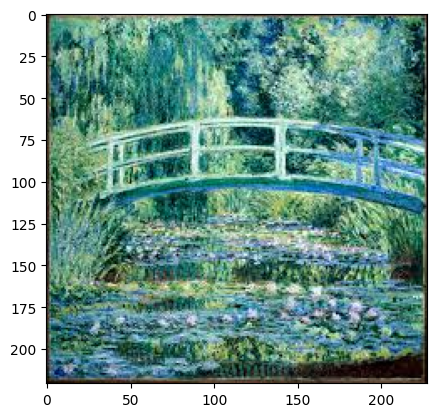

In [16]:
content_image.shape
plt.imshow(np.squeeze(style_image))
plt.show()

In [17]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

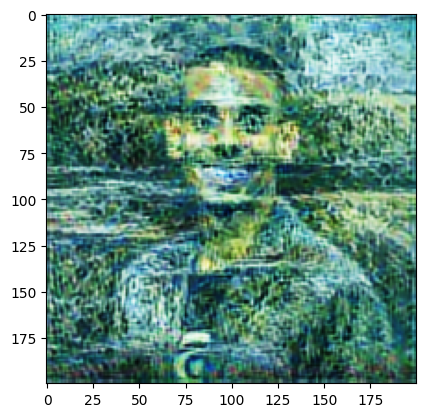

In [18]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [20]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))


True

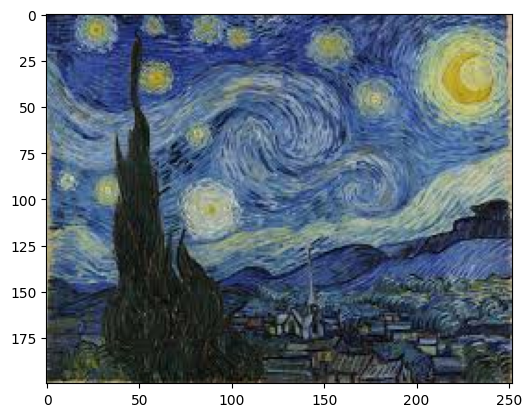

In [29]:
content_image = load_image('park.jpeg')
style_image = load_image('starrynight.jfif')

plt.imshow(np.squeeze(style_image))
plt.show()

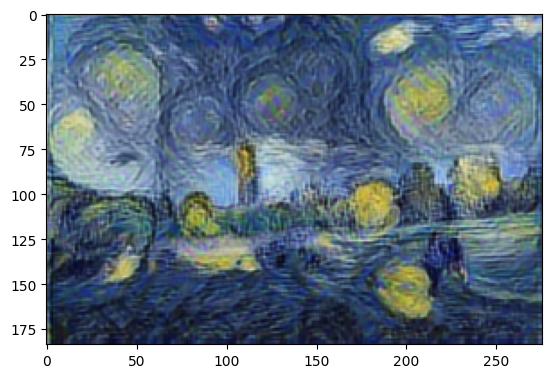

In [30]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
plt.imshow(np.squeeze(stylized_image))
plt.show()